In [1]:
from pylab import *
import math
import numpy as np

# tolerance
epsilon = 0.000001

# range of gamma values to sample
# you can increase this range beyond 1 

delta = 0.000001
angle_range = np.arange(0,math.pi/2,delta)

#estimate gamma value that gives orbit of period n 
def pp_wedge(n):
    pp_angle = []
    min_error = []
    error = np.array([None]*len(angle_range))
    for i in range(len(angle_range)):
        phi =angle_range[i]
        identity = np.array([[1,0,0],
                           [0,1,0],
                           [0,0,1]])
        state = identity
        #run the simulation for this particular angle
        col_count = 0
        while col_count < n:
            state = next_state(state,phi)
            col_count += 1   
            
        error[i] =  find_error(state)
        #print(error[i])
    
    for i in range(1,len(angle_range)-1,1):
        #print(error1)
        if error[i-1] > error[i] and error[i+1] > error[i]:
            min_error = np.append(min_error, error[i])
            pp_angle = np.append(pp_angle, angle_range[i])
            
    plt.plot(angle_range, error, 'b-')
    plt.xlabel('$\phi$')
    plt.ylabel('error')
    plt.show()        
            
    return [min_error, pp_angle]
            
# error is the residual sum of squares between the transformation in the nth step and identity matrix    
def rotation_x(phi):
    return np.array([[cos(phi),0,-sin(phi)],
                        [0, 1, 0],
                        [sin(phi),0, cos(phi)]])
def rotation_omega(phi):
    return np.array([[1,0,0],
                        [0,cos(phi), -sin(phi)],
                        [0,sin(phi), cos(phi)]])

def reflection(gamma):
    return np.array([[-(1-gamma**2)/(1+gamma**2), -2*gamma/(1+gamma**2),0],
                                    [-2*gamma/(1+gamma**2),(1-gamma**2)/(1+gamma**2),0],
                                   [0,0,-1]])

def next_state(current_state, phi):
    R_omega = rotation_omega(-phi)
    R_x = rotation_x(2*phi)
    return np.dot(np.dot(np.dot(R_omega, R_x), R_omega), current_state) 
            
        

def find_error(x):
    error = 0 
    for i in range(3):
        for j in range(3):
            if i == j: 
                error += (x[i][j]-1)**2 
            else:
                error += x[i][j]**2
    return error


#n is the number of left right consecutive collision pairs
n = 5

for i in range(3,n,1):
    print('N = ' + str(i))
    temp1 = pp_wedge(i)
    print('pp wedge(numerical):' + str(temp1))    
#     temp2 = gamma_periodic_analytical(i)
#     print('pp gamma/s (analytical):' + str(temp2))

N = 3


<Figure size 640x480 with 1 Axes>

pp wedge(numerical):[array([2.56307799e-12, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
       8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
       8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
       8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
       8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
       8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
       8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
       8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
       8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
       8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
       8.00000000e+00, 8.00000000e+00, 8.00000000e+00, 8.00000000e+00,
       8.00000000e+00]), array([0.785398, 1.570576, 1.570603, 1.570611, 1.570622, 1.570628,
       1.570636, 1.570638, 1.570642, 1.570644, 1.570647, 1.570652,
       1.570654, 1.570659, 1.570664, 1.

<Figure size 640x480 with 1 Axes>

pp wedge(numerical):[array([3.57302077e-12]), array([0.571859])]


In [8]:
# Output for n = 10
# n = 4
# pp gamma/s (numerical):[1.]
# pp gamma/s (analytical):[1.]
# n = 6
# pp gamma/s (numerical):[0.57735]
# pp gamma/s (analytical):[0.57735027]
# n = 8
# pp gamma/s (numerical):[0.41421 1.     ]
# pp gamma/s (analytical):[0.41421356 1.        ]
# n = 10
# pp gamma/s (numerical):[0.32492 0.72654]
# pp gamma/s (analytical):[0.3249197  0.72654253]
# n = 12
# pp gamma/s (numerical):[0.26795 0.57735 1.     ]
# pp gamma/s (analytical):[0.26794919 0.57735027 1.        ]
# n = 14
# pp gamma/s (numerical):[0.22824 0.48157 0.79747]
# pp gamma/s (analytical):[0.22824347 0.48157462 0.79747339]
# n = 16
# pp gamma/s (numerical):[0.19891 0.41421 0.66818 1.     ]
# pp gamma/s (analytical):[0.19891237 0.41421356 0.66817864 1.        ]
# n = 18
# pp gamma/s (numerical):[0.17633 0.36397 0.57735 0.8391 ]
# pp gamma/s (analytical):[0.17632698 0.36397023 0.57735027 0.83909963]
# n = 20
# pp gamma/s (numerical):[0.15838 0.32492 0.50953 0.72654 1.     ]
# pp gamma/s (analytical):[0.15838444 0.3249197  0.50952545 0.72654253 1.        ]    

In [50]:
a = math.pi
print(a)
x = 2/3;
b = 2*math.pi-3;
print(b)

3.14159265359
3.28318530718


In [11]:
x = 0.57186/(math.pi/2)
print(x)

0.364057383026


(0.993248, 0.906157, 0.143936, 1.0)

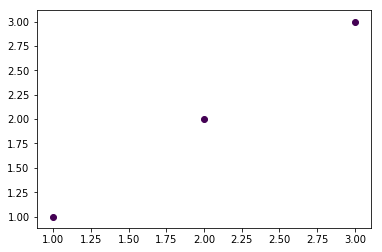

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
newcmp = ListedColormap(newcolors)
plt.scatter([1, 2, 3], [1, 2, 3] ,c = newcmp(10))

print(newcmp)
newcmp(1000)

In [52]:
import numpy as np
from sympy import *


def rotation_omega(phi):
    return np.array([[1,0,0],
                        [0,cos(phi), -sin(phi)],
                        [0,sin(phi), cos(phi)]])

var('phi')
T_ring = np.array([[0,-1,0],
                        [-1,0, 0],
                        [0,0, -1]])
R = np.dot(np.dot(T_ring,rotation_omega(-2*phi)),T_ring)  
print(R)
R1 = np.dot(np.dot(rotation_omega(phi),R),rotation_omega(phi))
print(R1)

[[cos(2*phi) 0 sin(2*phi)]
 [0 1 0]
 [-sin(2*phi) 0 cos(2*phi)]]
[[cos(2*phi) sin(phi)*sin(2*phi) sin(2*phi)*cos(phi)]
 [sin(phi)*sin(2*phi) -sin(phi)**2*cos(2*phi) + cos(phi)**2
  -sin(phi)*cos(phi)*cos(2*phi) - sin(phi)*cos(phi)]
 [-sin(2*phi)*cos(phi) sin(phi)*cos(phi)*cos(2*phi) + sin(phi)*cos(phi)
  -sin(phi)**2 + cos(phi)**2*cos(2*phi)]]
